In [31]:
import pandas as pd
from scipy import stats
import numpy as np
df = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/lung-volume.csv')
import matplotlib.pyplot as plt
import seaborn as sea
df

,group,patient,t1,t2
0,1,1-1,4226,4497
1,1,1-2,5731,5665
2,1,1-3,3912,4505
3,1,1-4,4811,6472
4,1,1-5,5128,4710
...,...,...,...,...
395,3,3-96,2819,2717
396,3,3-97,2809,2613
397,3,3-98,3338,3064
398,3,3-99,3173,3008


Group 1 Time 1: ShapiroResult(statistic=0.9932352304458618, pvalue=0.49158555269241333)
Group 1 Time 2: ShapiroResult(statistic=0.9955825805664062, pvalue=0.8313398361206055)
Group 2 Time 1: ShapiroResult(statistic=0.9940204620361328, pvalue=0.9413034319877625)
Group 2 Time 2: ShapiroResult(statistic=0.9911353588104248, pvalue=0.75565105676651)
Group 3 Time 1: ShapiroResult(statistic=0.9901384711265564, pvalue=0.6757938265800476)
Group 3 Time 2: ShapiroResult(statistic=0.9781967401504517, pvalue=0.09609369188547134)


(array([ 3.,  4.,  3., 16., 23., 19., 16., 10.,  5.,  1.]),
 array([1712. , 2283.8, 2855.6, 3427.4, 3999.2, 4571. , 5142.8, 5714.6,
        6286.4, 6858.2, 7430. ]),
 <BarContainer object of 10 artists>)

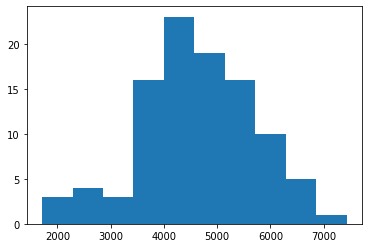

In [13]:
group1 = df[(df['group'] == 1)]
group2 = df[(df['group'] == 2)]
group3 = df[(df['group'] == 3)]
print('Group 1 Time 1:', stats.shapiro(group1['t1']))
print('Group 1 Time 2:', stats.shapiro(group1['t2']))
print('Group 2 Time 1:', stats.shapiro(group2['t1']))
print('Group 2 Time 2:', stats.shapiro(group2['t2']))
print('Group 3 Time 1:', stats.shapiro(group3['t1']))
print('Group 3 Time 2:', stats.shapiro(group3['t2']))
plt.hist(group2['t2'])

The Shapiro tests indicate that the data is mostly normally distributed, group 3 time 2 has the lowest p value for this test, but generating the histogram of this data shows a mostly normal shape with a sharp rise around 3500. We will take this into consideration during further analysis. 

In [17]:
g1t1 = group1['t1']
g1t2 = group1['t2']
g2t1 = group2['t1']
g2t2 = group2['t2']
g3t1 = group3['t1']
g3t2 = group3['t2']

print('Group 1:', stats.ttest_rel(g1t1, g1t2))
print('Group 2:', stats.ttest_rel(g2t1, g2t2))
print('Group 3:', stats.ttest_rel(g3t1, g3t2))


Group 1: Ttest_relResult(statistic=-0.31827677584963787, pvalue=0.7506087664956842)
Group 2: Ttest_relResult(statistic=0.32745622415118286, pvalue=0.7440142766032991)
Group 3: Ttest_relResult(statistic=0.8984773127301627, pvalue=0.37111115842334486)


There is no significant difference between time 1 and time 2 for any of the groups. 

In [20]:
print('Group 1:', np.std(g1t2))
print('Group 2:', np.std(g2t2))
print('Group 3:', np.std(g3t2))

stats.f_oneway(g1t2, g2t2, g3t2)

Group 1: 1007.0247633375258
Group 2: 1097.2471918396511
Group 3: 973.6588566330612


F_onewayResult(statistic=67.65846945026495, pvalue=5.1893599904179e-26)

There is a significant difference between the means of all groups at time t2

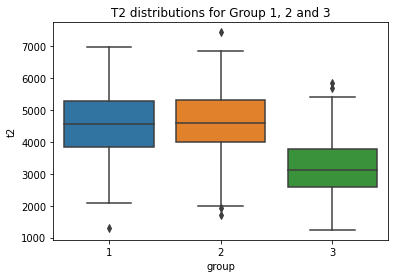

In [36]:
sea.boxplot(x='group', y='t2', data=df)
plt.title('T2 distributions for Group 1, 2 and 3')
plt.show()